In [197]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [198]:
# Load statsbomb data
# https://github.com/statsbomb/open-data

matches = pd.read_csv('matches_statsbomb.csv')

In [199]:
# A quick look at the data
matches.head()

,Unnamed: 0,match_id,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition.competition_id,...,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name,metadata.xy_fidelity_version
0,0,9592,2017-09-09,20:45:00.000,5,0,available,2020-07-29T05:00,3,11,...,Regular Season,342.0,Camp Nou,214.0,Spain,183.0,Jesús Gil,214.0,Spain,NaN
1,1,9870,2018-04-07,20:45:00.000,3,1,available,2020-07-29T05:00,31,11,...,Regular Season,342.0,Camp Nou,214.0,Spain,215.0,Ricardo De Burgos,112.0,Italy,NaN
2,2,9783,2018-02-04,16:15:00.000,1,1,available,2020-07-29T05:00,22,11,...,Regular Season,351.0,RCDE Stadium,214.0,Spain,183.0,Jesús Gil,214.0,Spain,NaN
3,3,9609,2017-09-19,22:00:00.000,6,1,available,2020-07-29T05:00,5,11,...,Regular Season,342.0,Camp Nou,214.0,Spain,208.0,Alejandro Hernández,112.0,Italy,NaN
4,4,9700,2017-12-02,13:00:00.000,2,2,available,2020-07-29T05:00,14,11,...,Regular Season,342.0,Camp Nou,214.0,Spain,209.0,Mario Melero,112.0,Italy,NaN


In [200]:
# Lists of team names for top3 and rest
teams = matches['home_team.home_team_name'].value_counts().index.tolist()
top3_list = teams[:2] + teams[3:4]
rest_list = teams[2:3] + teams[4:]

print('Top3 list: {}'.format(top3_list))
print()
print('Rest list: {}'.format(rest_list))

Top3 list: ['Barcelona', 'Real Madrid', 'Atlético Madrid']

Rest list: ['Villarreal', 'Valencia', 'Espanyol', 'Sevilla', 'Real Sociedad', 'Getafe', 'Athletic Bilbao', 'Real Betis', 'Levante', 'Deportivo La Coruna', 'Osasuna', 'Real Valladolid', 'Celta Vigo', 'Málaga', 'Eibar', 'Granada', 'Real Zaragoza', 'Mallorca', 'Racing Santander', 'Almería', 'Sporting Gijón', 'Rayo Vallecano', 'Deportivo Alavés', 'Leganés', 'Recreativo Huelva', 'Las Palmas', 'Elche', 'Girona', 'Tenerife', 'Albacete', 'Hércules', 'Gimnàstic Tarragona', 'Real Murcia', 'Córdoba', 'Xerez', 'Numancia', 'Cádiz']


In [201]:
# Classify top3 and rest
matches['ci_id'] = None
for teams in matches.itertuples():
    if teams[16] in top3_list:
        matches['ci_id'][teams[0]] = 'top3'
    else:
        matches['ci_id'][teams[0]] = 'rest'

matches['ci_id'].head()

0    top3
1    top3
2    rest
3    top3
4    top3
Name: ci_id, dtype: object

In [202]:
# Variables with series of top3: home and away and rest: home and away
top3_home = matches[matches['ci_id'] == 'top3']['home_score']
top3_away = matches[matches['ci_id'] == 'top3']['away_score']

rest_home = matches[matches['ci_id'] == 'rest']['home_score'] 
rest_away = matches[matches['ci_id'] == 'rest']['away_score']

Text(0.5, 1.0, 'Rest goals: home vs away')

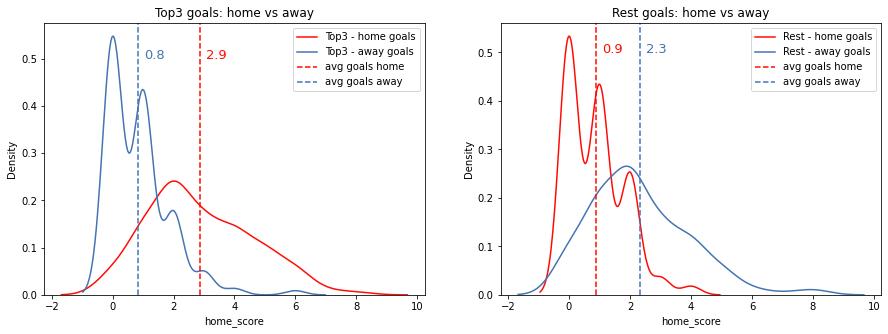

In [203]:
# Let's visualise all goals

# Set palette colors
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

# Setting sizes and subplots
figsize = (15, 5)
f, (ax1, ax2) = plt.subplots(figsize=figsize, ncols=2)

# Plotting kdeplots
sns.kdeplot(top3_home, ax=ax1, label='Top3 - home goals')
sns.kdeplot(top3_away, ax=ax1, label='Top3 - away goals')
sns.kdeplot(rest_home, ax=ax2, label='Rest - home goals')
sns.kdeplot(rest_away, ax=ax2, label='Rest - away goals')

# Adding mean lines
ax1.axvline(top3_home.mean(), color='#FF0B04', linestyle='--', label='avg goals home')
ax1.axvline(top3_away.mean(), color='#4374B3', linestyle='--', label='avg goals away')

ax2.axvline(rest_home.mean(), color='#FF0B04', linestyle='--', label='avg goals home')
ax2.axvline(rest_away.mean(), color='#4374B3', linestyle='--', label='avg goals away')

# Adding legend
ax1.legend()
ax2.legend()

# Adding text with mean values
ax1.text(top3_home.mean() + 0.20, 0.5, str(round(top3_home.mean(), 1)), color='#FF0B04', fontsize=13)
ax1.text(top3_away.mean() + 0.20, 0.5, str(round(top3_away.mean(), 1)), color='#4374B3', fontsize=13)

ax2.text(rest_home.mean() + 0.20, 0.5, str(round(rest_home.mean(), 1)), color='#FF0B04', fontsize=13)
ax2.text(rest_away.mean() + 0.20, 0.5, str(round(rest_away.mean(), 1)), color='#4374B3', fontsize=13)

#Adding title
ax1.set_title('Top3 goals: home vs away')
ax2.set_title('Rest goals: home vs away')

In [204]:
# Visualising differences between home and away scores
print(matches.groupby('ci_id').agg({'home_score': [np.mean, np.std, np.size]}))
print()
print(matches.groupby('ci_id').agg({'away_score': [np.mean, np.std, np.size]}))

home_score               
            mean       std size
ci_id                          
rest    0.877358  0.920569  212
top3    2.871795  1.721953  273

      away_score               
            mean       std size
ci_id                          
rest    2.320755  1.623566  212
top3    0.846154  1.006484  273


Text(0.5, 1.0, 'Goals away')

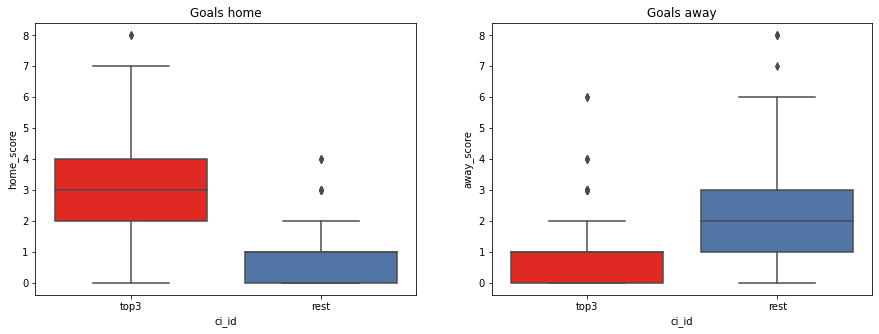

In [205]:
# Plotting boxplots to see check variance between samples
figsize = (15, 5)
f, (ax1, ax2) = plt.subplots(figsize=figsize, ncols=2)

sns.boxplot(x='ci_id', y='home_score', data=matches, ax=ax1)
sns.boxplot(x='ci_id', y='away_score', data=matches, ax=ax2)

ax1.set_title('Goals home')
ax2.set_title('Goals away')

In [206]:
# Because variances are not equal between samples, the unpooled approach was used
# Read here for more info: https://online.stat.psu.edu/stat500/lesson/7/7.3/7.3.1/7.3.1.2

best_estimate_home = top3_home.mean() - rest_home.mean()
best_estimate_away = top3_away.mean() - rest_away.mean()

sample_mean_diff_goals_home_top3 =top3_home.std()
sample_mean_diff_goals_home_rest = rest_home.std()

sample_mean_diff_goals_away_top3 = top3_home.std()
sample_mean_diff_goals_away_rest = top3_away.std()

n_top3 = matches[matches['ci_id'] == 'top3'].shape[0]
n_rest = matches[matches['ci_id'] == 'rest'].shape[0]

t_mult = 1.972

estimated_standard_error_home = np.sqrt((sample_mean_diff_goals_home_top3**2/n_top3)+(sample_mean_diff_goals_home_rest**2/n_rest))
estimated_standard_error_away = np.sqrt((sample_mean_diff_goals_away_top3**2/n_top3)+(sample_mean_diff_goals_away_rest**2/n_rest))

lower_bound_home = best_estimate_home - t_mult * estimated_standard_error_home
upper_bound_home = best_estimate_home + t_mult * estimated_standard_error_home 

lower_bound_away = best_estimate_away - t_mult * estimated_standard_error_away
upper_bound_away = best_estimate_away + t_mult * estimated_standard_error_away 

print("With 95% confidence, the difference in mean home goals between the top3 teams and the rest of teams in LaLiga is estimated to be between " + str(round(lower_bound_home, 1)) + " and " + str(round(upper_bound_home, 1)))
print()
print("With 95% confidence, the difference in mean away goals between the top3 teams and the rest of teams in LaLiga is estimated to be between " + str(round(lower_bound_away, 1)) + " and " + str(round(upper_bound_away, 1)))

With 95% confidence, the difference in mean home goals between the top3 teams and the rest of teams in LaLiga is estimated to be between 1.8 and 2.2

With 95% confidence, the difference in mean away goals between the top3 teams and the rest of teams in LaLiga is estimated to be between -1.7 and -1.2


# P-value for mean difference of independent groups

### From now onwards we calculate the <b><u>p-value</u></b>. The p-value is a probability value. The p-value indicates how likely it is that a result occured by chance alone.

### If the p-value is small, it indicates the result was <u>unlikely to have occurred by chance alone</u>. These results are know as being statistically significant.

In [207]:
# Let's check our hypothesis for home goals
import scipy.stats as stats

print('H0: {}'.format(0))
print('H1: {:.2f}'.format(best_estimate_home))

H0: 0
H1: 1.99


#### So our Null hypothesis (H0) is defined as 0. That is, if we believe that there is NO difference in the mean of home score goals between the top3 teams and the rest of teams in LaLiga.

#### On the other hand, our Alternative hypothesis (H1) is defined as 1.99. That is, if we believe that there is a 1.99 goal difference in the mean of home goals between the top3 teams and the rest of teams in LaLiga. Or in other words, if we believe that the top3 teams score <b>on average</b> 1.99 goals more than the rest of teams when they play at home.

In [208]:
# Let's test the hypothesis

# Random samples
top3_sample_home = np.random.choice(top3_home, 15)
rest_sample_home = np.random.choice(rest_home, 15)

# The T-test
tstat, p = stats.ttest_ind(top3_sample_home, rest_sample_home)

print('T-stat: {:.2f}'.format(tstat))
print('P-value: {:f}'.format(p))
print('Critical value: 0.05')

T-stat: 3.56
P-value: 0.001348
Critical value: 0.05


#### As mentioned above, a low p-value indicates that the result is very unlikely to happen by chance alone. In other words, it is there is a high probability that the top3 teams in LaLiga score at home on average 1.99 goals more than the rest of teams.

#### It is also important to note that we set our critical value or alpha to 0.05 (or 95%). Because the p-value (0.008) is LOWER than alpha (0.05) we can then REJECT the null hypothesis.

In [212]:
# Now let's check hypothesis for away goals
import scipy.stats as stats

print('H0: {}'.format(0))
print('H1: {:.2f}'.format(best_estimate_away))

H0: 0
H1: -1.47


In [210]:
# Let's test the hypothesis

# Random samples
top3_sample_away = np.random.choice(top3_away, 15)
rest_sample_away = np.random.choice(rest_away, 15)

# The T-test
tstat, p = stats.ttest_ind(top3_sample_away, rest_sample_away)

print('T-stat: {:.2f}'.format(tstat))
print('P-value: {:f}'.format(p))
print('Critical value: 0.05')

T-stat: -1.65
P-value: 0.109511
Critical value: 0.05


#### Similar ideas with the above result. However, here H1 is -1.47. That is, H1 tell us that on average the rest of teams in LaLiga score 1.47 goals more than the top3 teams <b>when playing away</b>. Once again, the p-value is lower than alpha.